<a href="https://colab.research.google.com/github/mbewustanley/Feature_Eng_House_Prices/blob/main/fcc_MAGIC_(SUPERVISED_LEARNING_Classification_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('/content/drive/MyDrive/Kaggle_Datasets/magic+gamma+telescope/magic04.data', names=cols)

Dataset source:
Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [4]:
df['class'].unique()
df['class'] = (df['class'] == 'g').astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

Its a good idea to plot graphs to see which features align more, or have a relationship with our target vector (class)

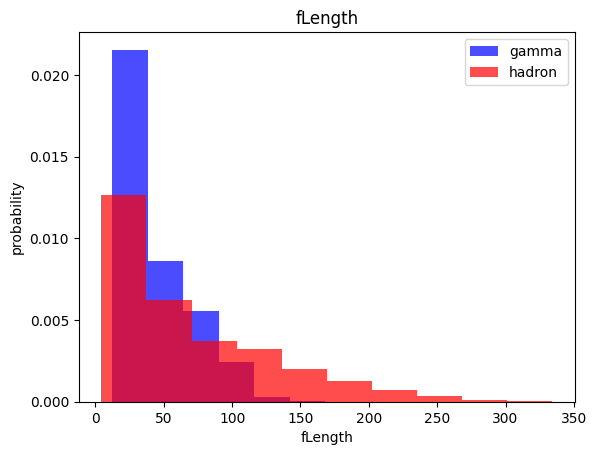

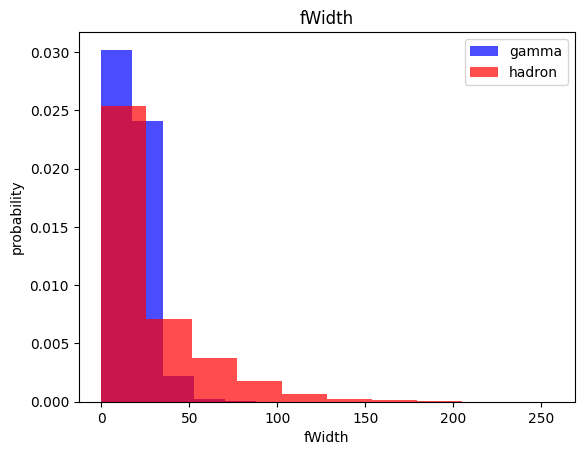

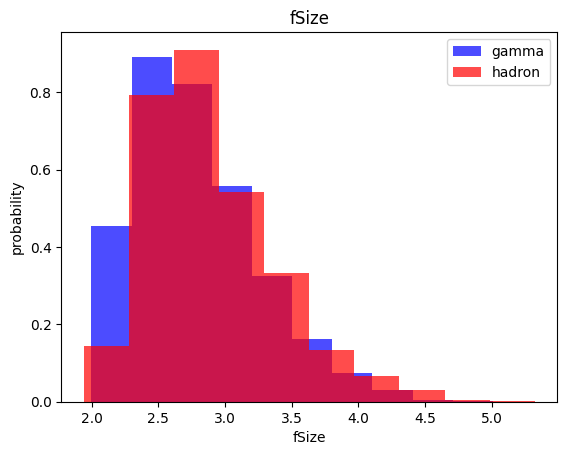

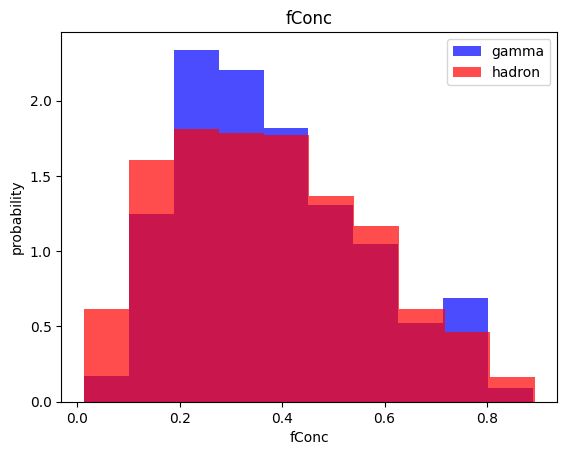

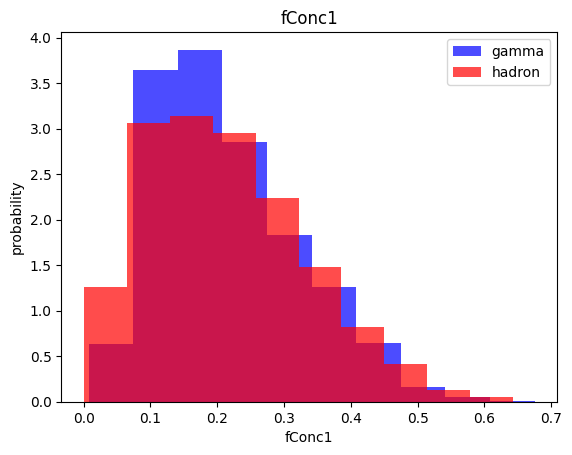

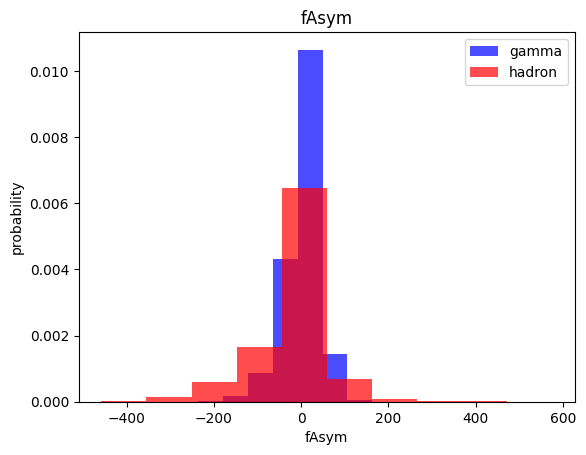

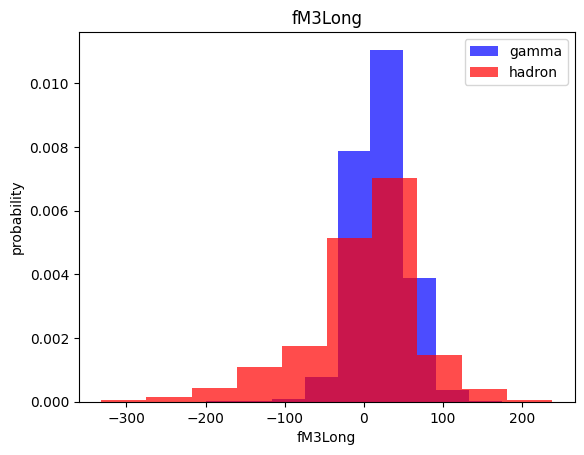

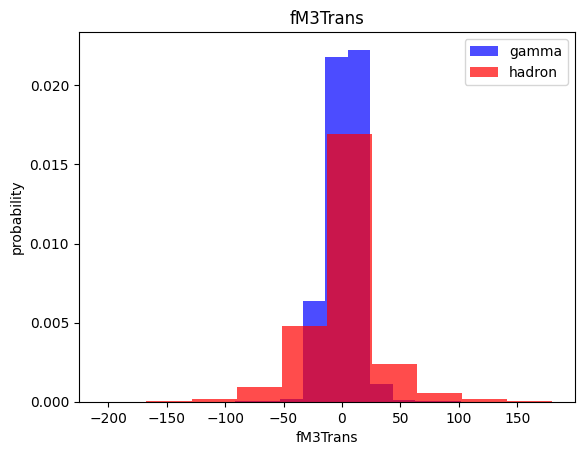

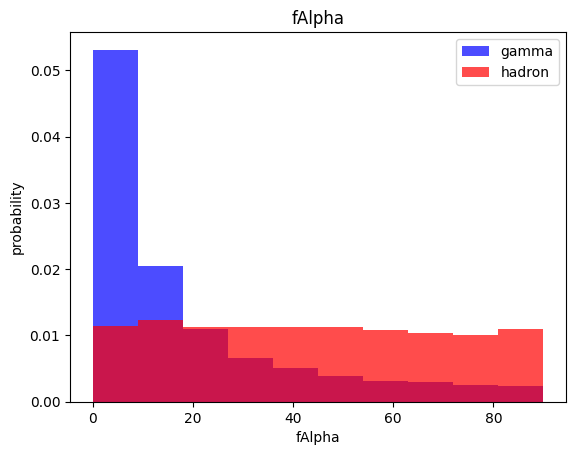

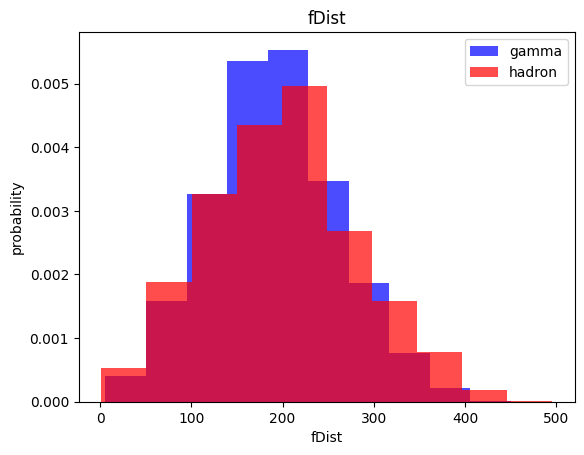

In [6]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


Splitting the datasets
>
Train, Validation, and test datasets


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
"""import a scaler to scale the values in the dataframe
and an oversampler to balance the dataset"""

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#function to transform and scale the values in our dataframe
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  #scaling the values in the dataset
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  """
  where there are more rows for class == 0 than class == 1, we need a way to balance
  hence we use oversample which takes more of the less class
  to increase the size of the dataset of that smaller dataset"""

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)


  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# **Classification Models**


KNN (K-Nearest Neighbors)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train) #fit the model to the training data set

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn_model.predict(X_test) #make predictions on the test set

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1308
           1       0.84      0.88      0.86      2496

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



NAIVE BAYES MODEL

In [13]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test) #make predictions on the test set

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1308
           1       0.74      0.90      0.81      2496

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1308
           1       0.86      0.82      0.84      2496

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



SVMs (Support Vector Machines)

In [18]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1308
           1       0.89      0.90      0.90      2496

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Classification Neural Network

In [20]:
import tensorflow as tf

In [21]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentrophy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [22]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train,
                       epochs=epochs, batch_size=batch_size,
                       validation_split=0.2, verbose=0)
  return nn_model, history


In [23]:
"""nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history = nn_model.fit(X_train, y_train,
                       epochs=100, batch_size=32,
                       validation_split=0.2)"""

"nn_model = tf.keras.Sequential([\n    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),\n    tf.keras.layers.Dense(32, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),\n                 loss='binary_crossentropy',\n                 metrics=['accuracy'])\n\nhistory = nn_model.fit(X_train, y_train,\n                       epochs=100, batch_size=32,\n                       validation_split=0.2)"

16 nodes, dropout 0, lr 0.01, batch size 32


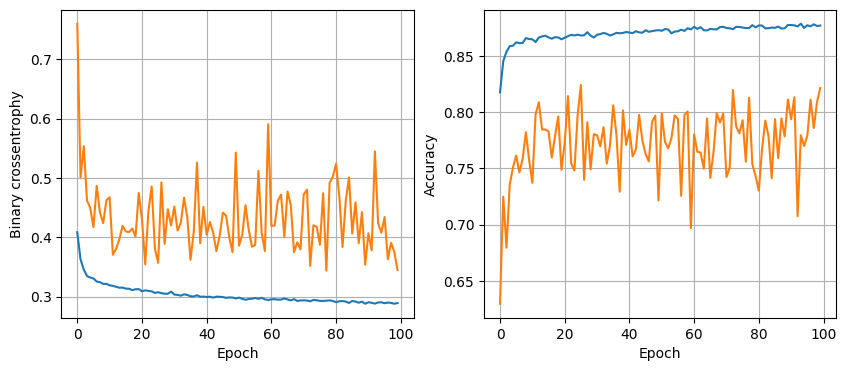

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3036
Validation loss: [0.3156355023384094, 0.8722397685050964]
--------------------------------------------------
16 nodes, dropout 0, lr 0.01, batch size 64


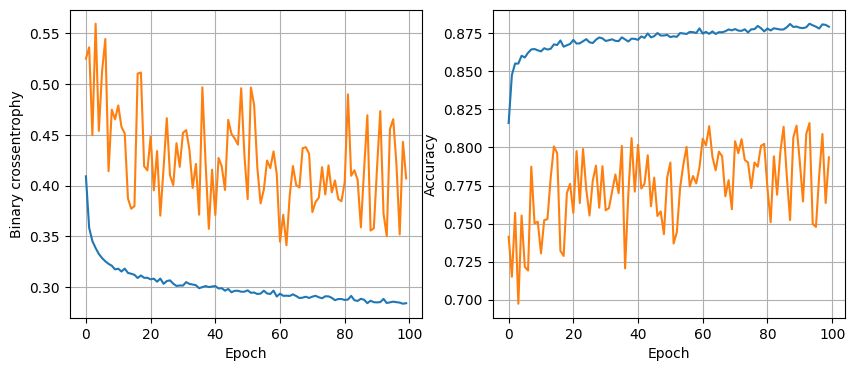

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8840 - loss: 0.2864
Validation loss: [0.29704877734184265, 0.8761829733848572]
--------------------------------------------------
16 nodes, dropout 0, lr 0.01, batch size 128


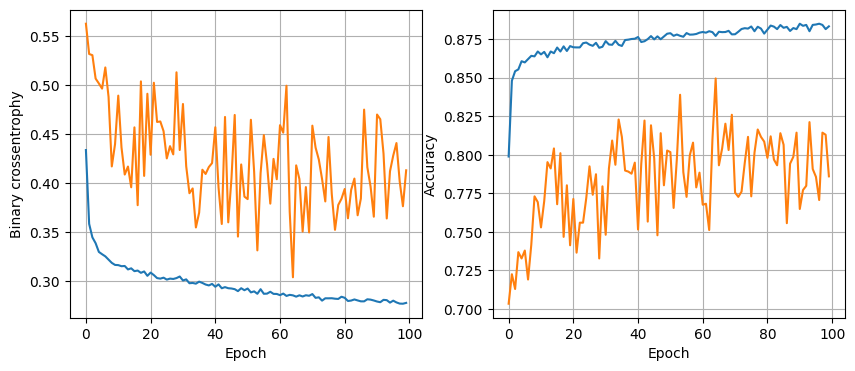

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.3005
Validation loss: [0.31175002455711365, 0.8740799427032471]
--------------------------------------------------
16 nodes, dropout 0, lr 0.005, batch size 32


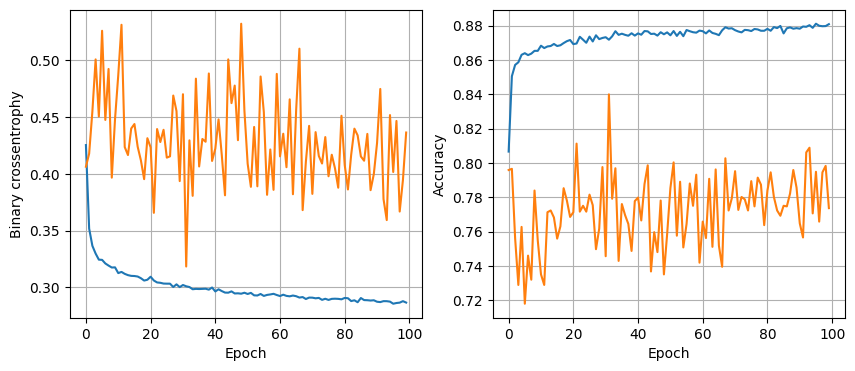

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.2966
Validation loss: [0.30288317799568176, 0.874605655670166]
--------------------------------------------------
16 nodes, dropout 0, lr 0.005, batch size 64


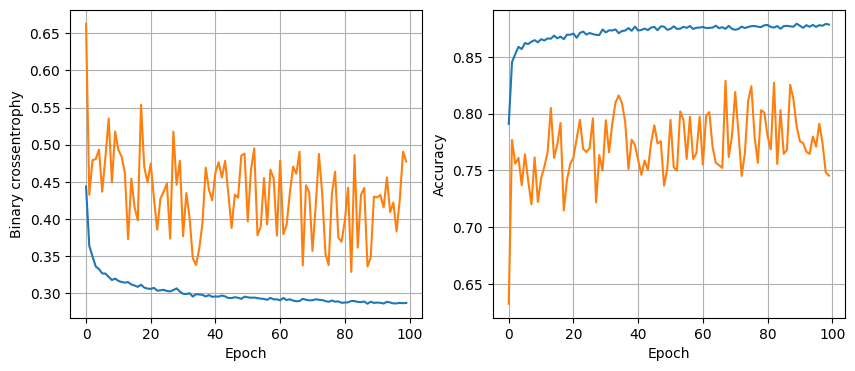

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.2917
Validation loss: [0.3068552315235138, 0.8698738217353821]
--------------------------------------------------
16 nodes, dropout 0, lr 0.005, batch size 128


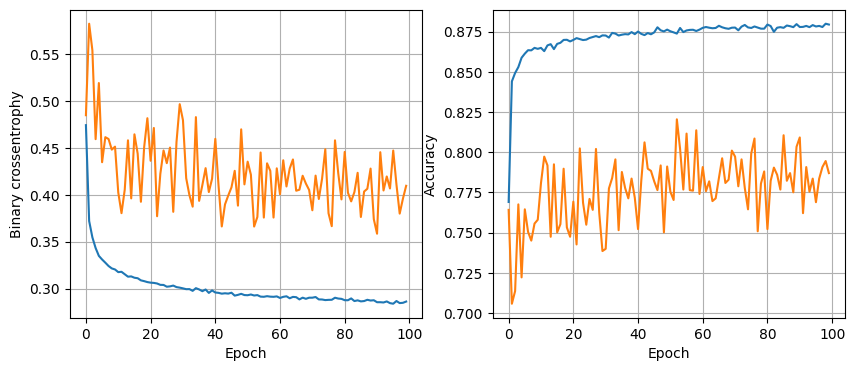

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.2946
Validation loss: [0.3058922588825226, 0.875394344329834]
--------------------------------------------------
16 nodes, dropout 0, lr 0.001, batch size 32


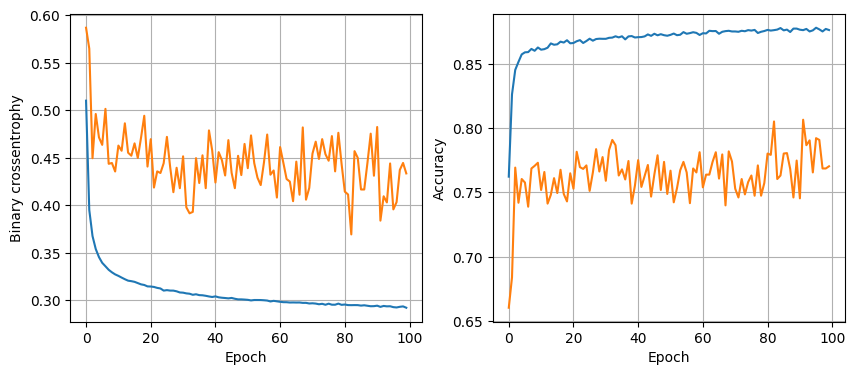

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.2876
Validation loss: [0.2994154095649719, 0.8772345185279846]
--------------------------------------------------
16 nodes, dropout 0, lr 0.001, batch size 64


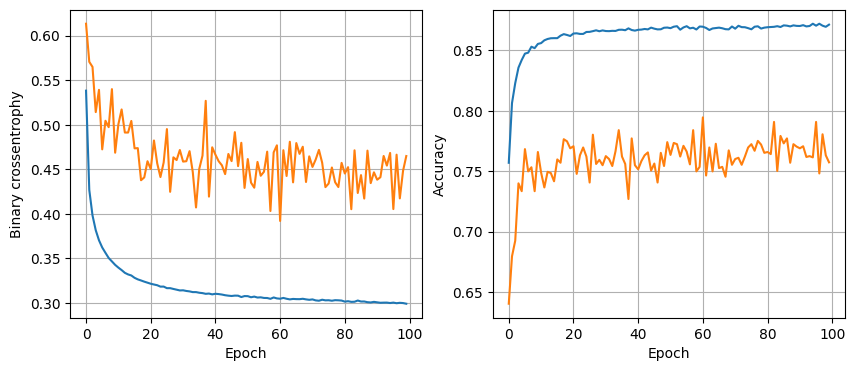

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2930
Validation loss: [0.29935309290885925, 0.8777602314949036]
--------------------------------------------------
16 nodes, dropout 0, lr 0.001, batch size 128


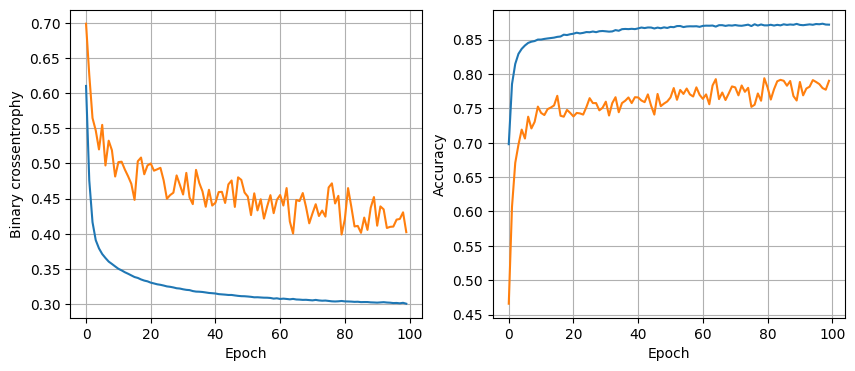

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8756 - loss: 0.3020
Validation loss: [0.309742271900177, 0.8725026249885559]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.01, batch size 32


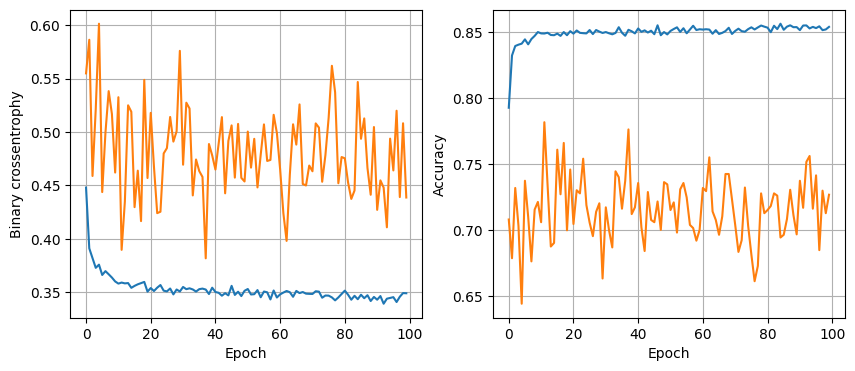

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3002
Validation loss: [0.3149908185005188, 0.8706624507904053]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.01, batch size 64


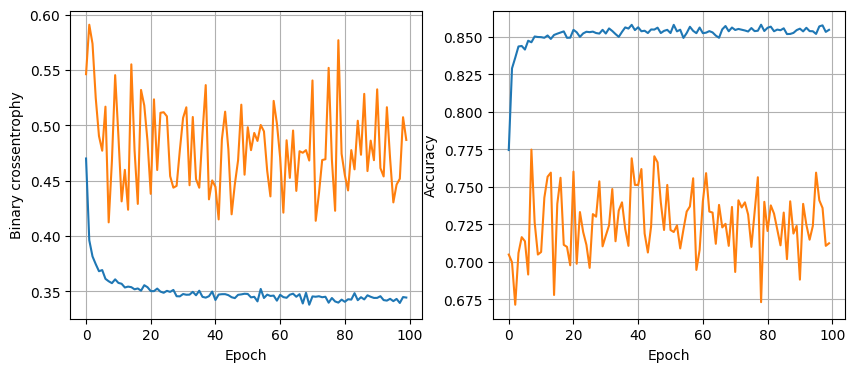

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.2985
Validation loss: [0.31270623207092285, 0.8696109652519226]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.01, batch size 128


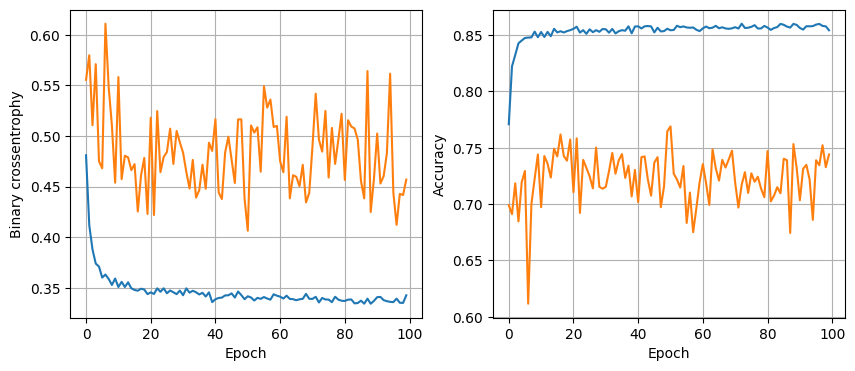

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.2973
Validation loss: [0.30527928471565247, 0.8748685717582703]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.005, batch size 32


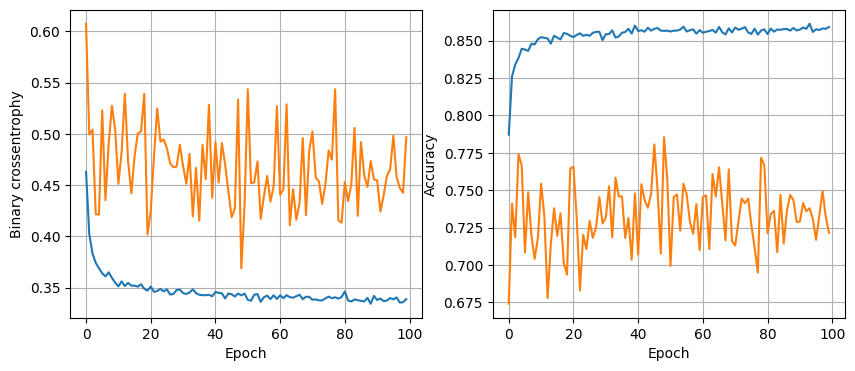

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.2902
Validation loss: [0.3040708005428314, 0.8756572008132935]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.005, batch size 64


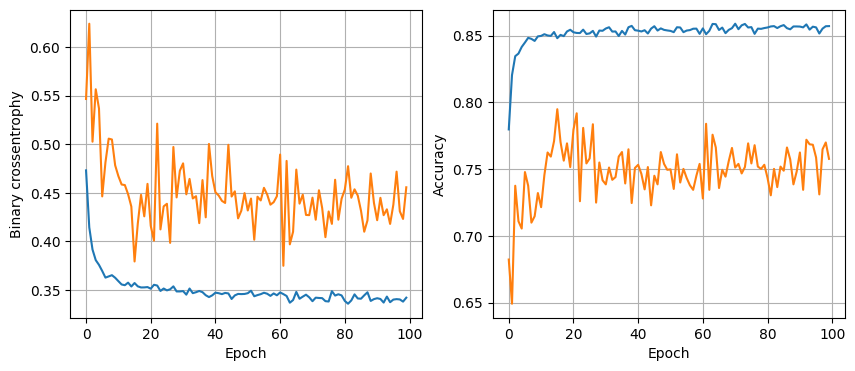

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.3006
Validation loss: [0.31304121017456055, 0.8769716024398804]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.005, batch size 128


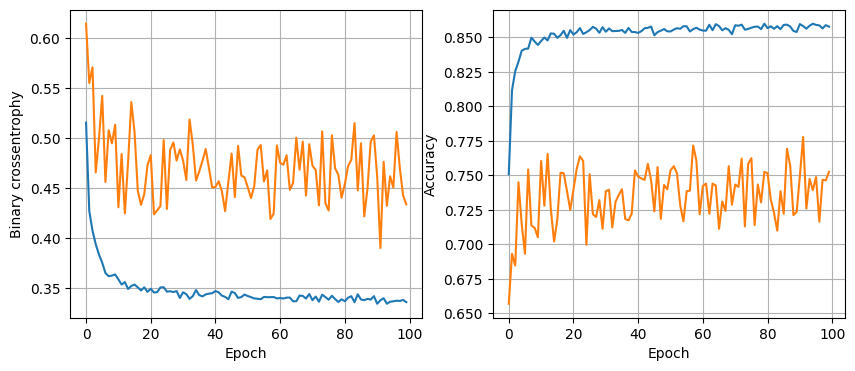

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8837 - loss: 0.2957
Validation loss: [0.3097686171531677, 0.8767087459564209]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.001, batch size 32


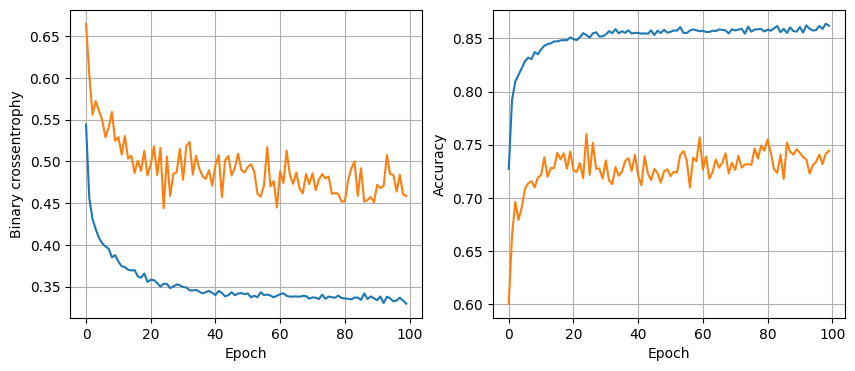

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8860 - loss: 0.2914
Validation loss: [0.3072797358036041, 0.878811776638031]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.001, batch size 64


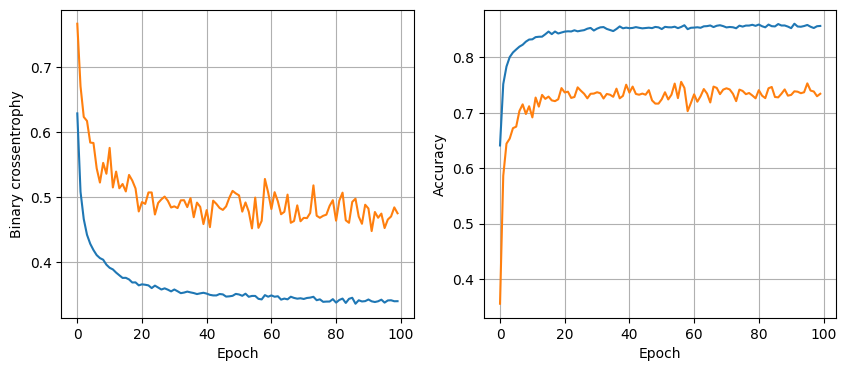

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.3041
Validation loss: [0.3155308961868286, 0.8719768524169922]
--------------------------------------------------
16 nodes, dropout 0.2, lr 0.001, batch size 128


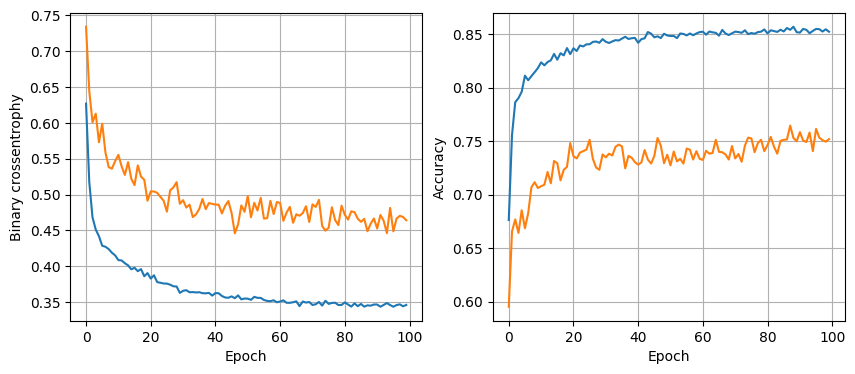

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.3007
Validation loss: [0.31470564007759094, 0.8725026249885559]
--------------------------------------------------
32 nodes, dropout 0, lr 0.01, batch size 32


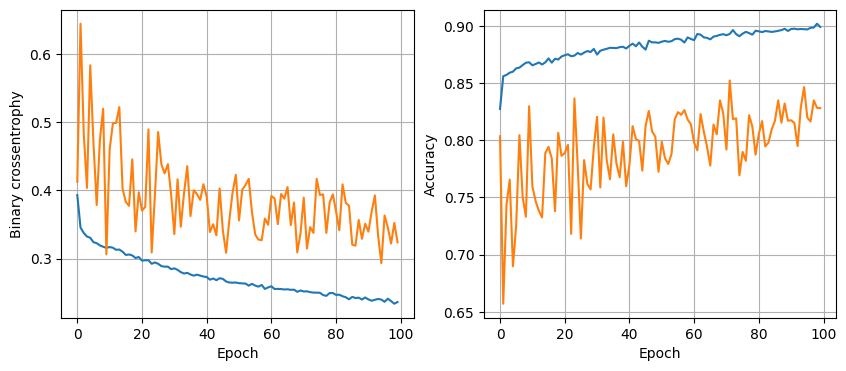

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3384
Validation loss: [0.3595297336578369, 0.8675078749656677]
--------------------------------------------------
32 nodes, dropout 0, lr 0.01, batch size 64


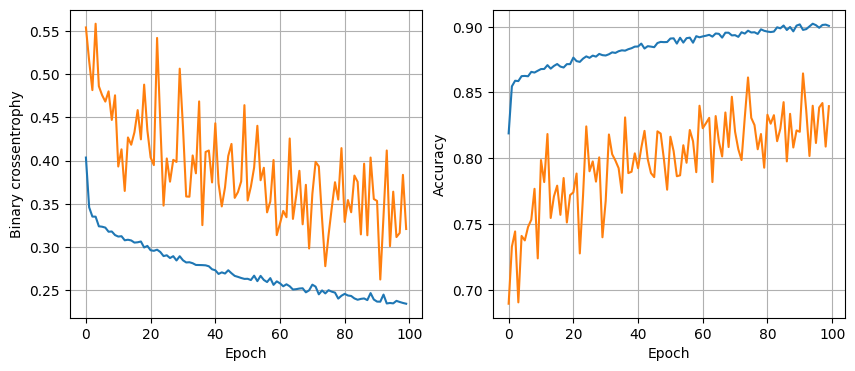

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3290
Validation loss: [0.3533249795436859, 0.8701366782188416]
--------------------------------------------------
32 nodes, dropout 0, lr 0.01, batch size 128


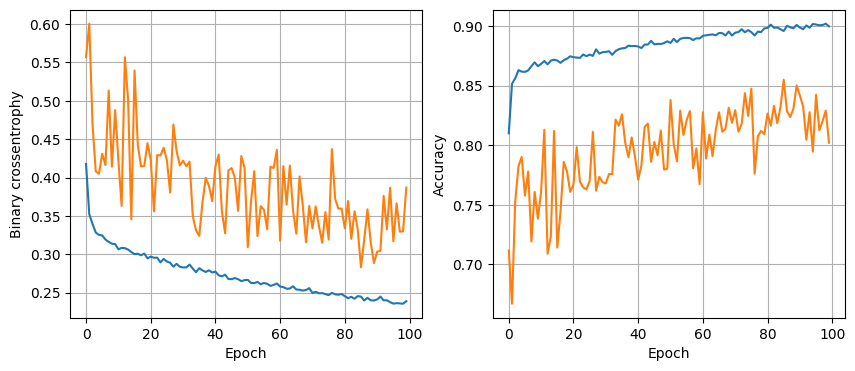

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8714 - loss: 0.3287
Validation loss: [0.3344002962112427, 0.8725026249885559]
--------------------------------------------------
32 nodes, dropout 0, lr 0.005, batch size 32


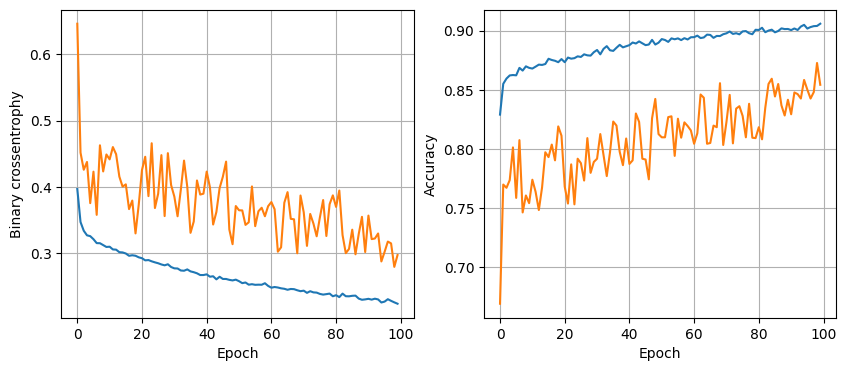

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3462
Validation loss: [0.3548234701156616, 0.8693480491638184]
--------------------------------------------------
32 nodes, dropout 0, lr 0.005, batch size 64


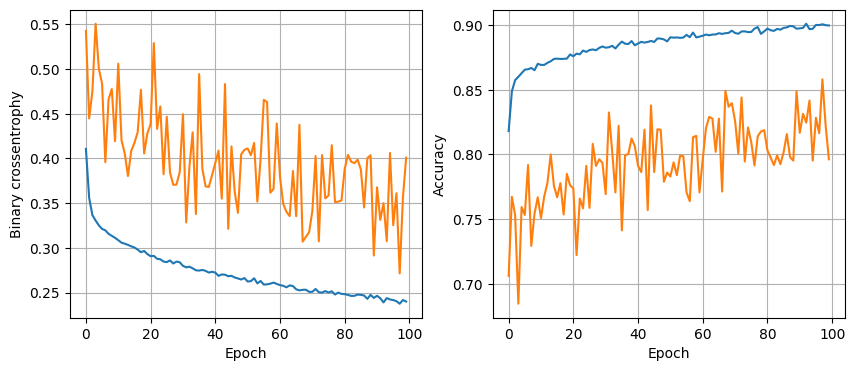

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8731 - loss: 0.3193
Validation loss: [0.3363056182861328, 0.871188223361969]
--------------------------------------------------
32 nodes, dropout 0, lr 0.005, batch size 128


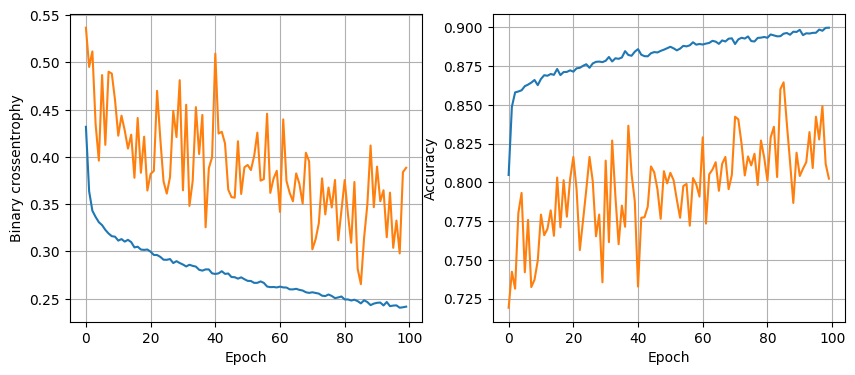

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.3048
Validation loss: [0.320329487323761, 0.8782860040664673]
--------------------------------------------------
32 nodes, dropout 0, lr 0.001, batch size 32


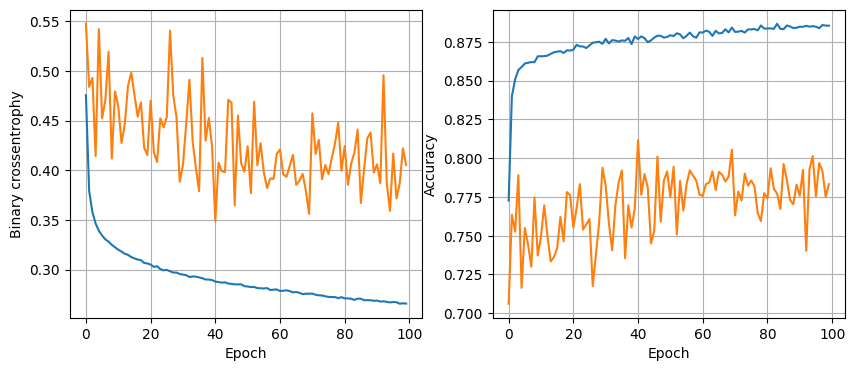

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8780 - loss: 0.2960
Validation loss: [0.3020347058773041, 0.8782860040664673]
--------------------------------------------------
32 nodes, dropout 0, lr 0.001, batch size 64


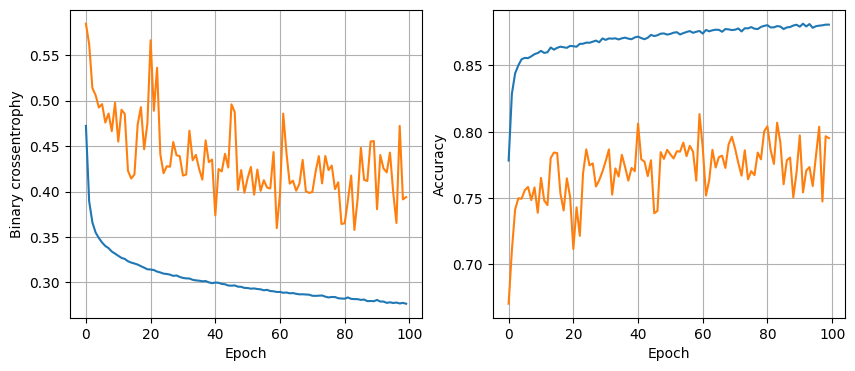

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.2904
Validation loss: [0.29930105805397034, 0.8748685717582703]
--------------------------------------------------
32 nodes, dropout 0, lr 0.001, batch size 128


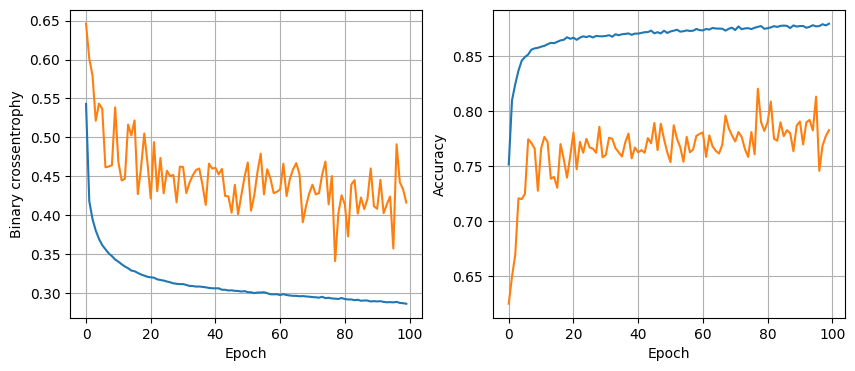

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.2903
Validation loss: [0.3027631342411041, 0.8761829733848572]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.01, batch size 32


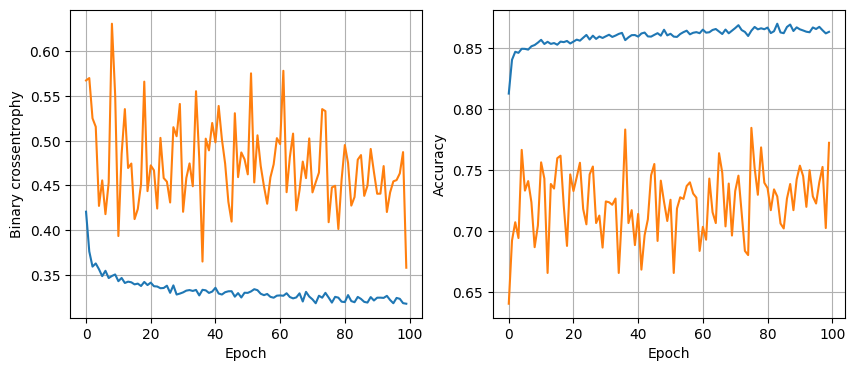

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.2982
Validation loss: [0.3080352544784546, 0.8811777234077454]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.01, batch size 64


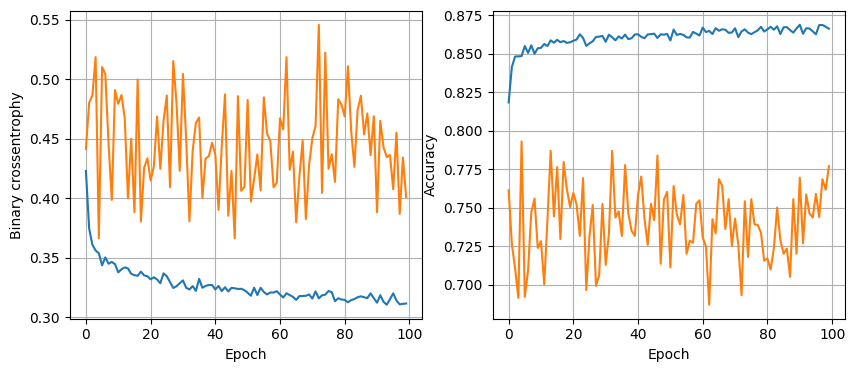

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.2905
Validation loss: [0.300156831741333, 0.8798633217811584]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.01, batch size 128


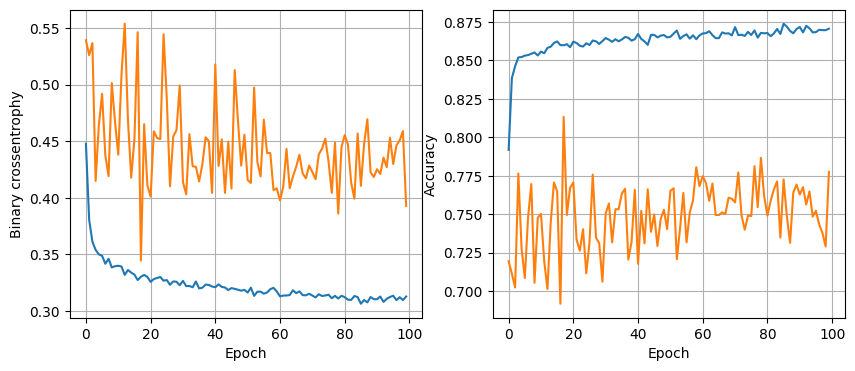

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8868 - loss: 0.2869
Validation loss: [0.298933744430542, 0.8803890347480774]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.005, batch size 32


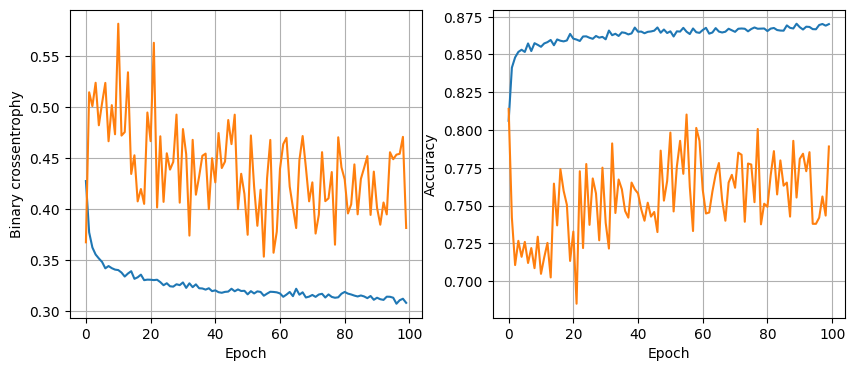

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.2914
Validation loss: [0.30650460720062256, 0.8769716024398804]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.005, batch size 64


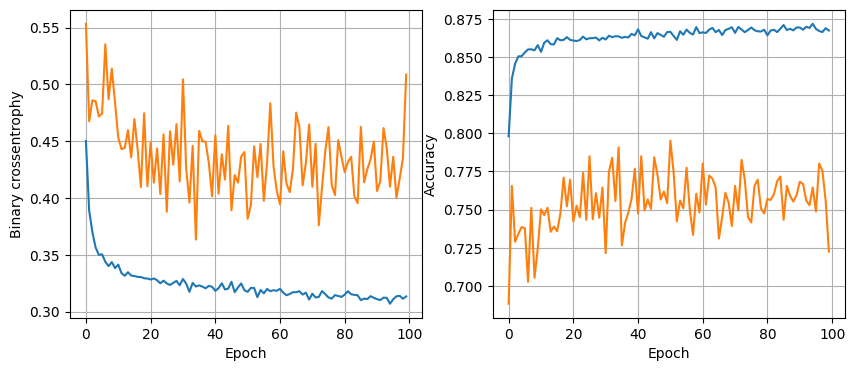

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.2852
Validation loss: [0.2956872880458832, 0.8790746331214905]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.005, batch size 128


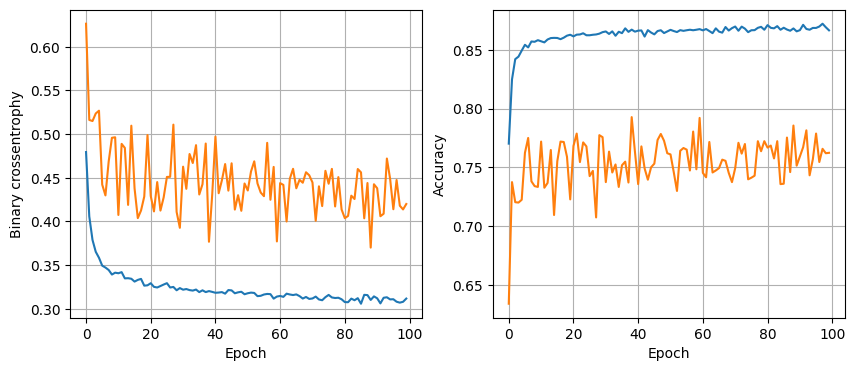

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8857 - loss: 0.2886
Validation loss: [0.2986133098602295, 0.8785489201545715]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.001, batch size 32


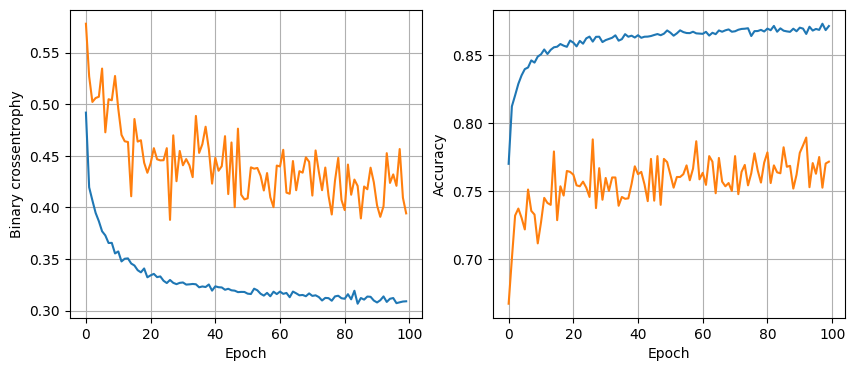

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8822 - loss: 0.2881
Validation loss: [0.2969725430011749, 0.8793375492095947]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.001, batch size 64


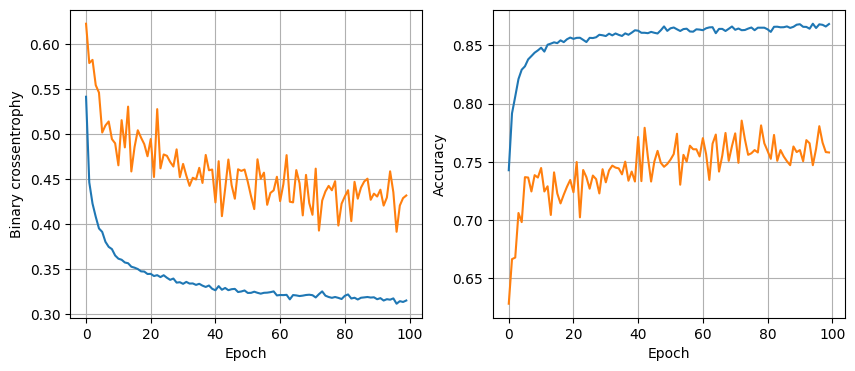

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8807 - loss: 0.2902
Validation loss: [0.29950153827667236, 0.8790746331214905]
--------------------------------------------------
32 nodes, dropout 0.2, lr 0.001, batch size 128


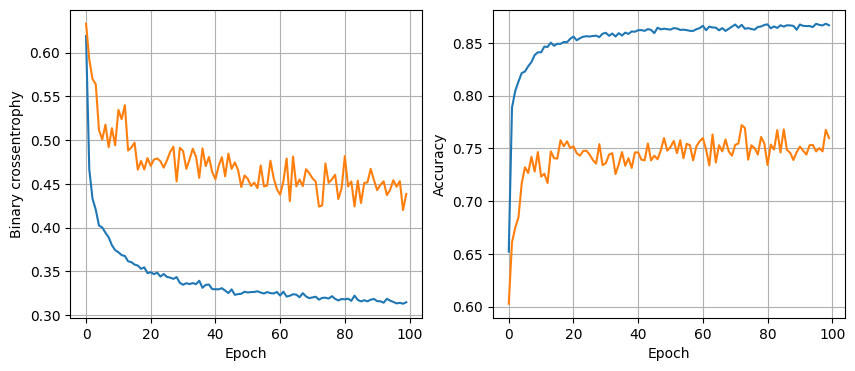

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.2892
Validation loss: [0.2998740077018738, 0.8767087459564209]
--------------------------------------------------
64 nodes, dropout 0, lr 0.01, batch size 32


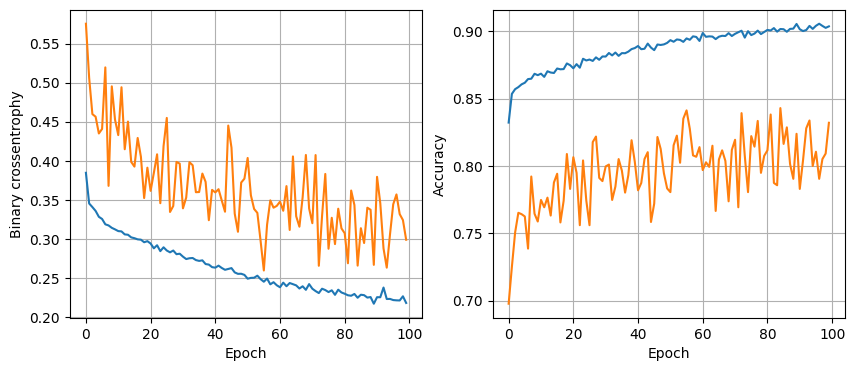

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.4247
Validation loss: [0.4325883388519287, 0.8659306168556213]
--------------------------------------------------
64 nodes, dropout 0, lr 0.01, batch size 64


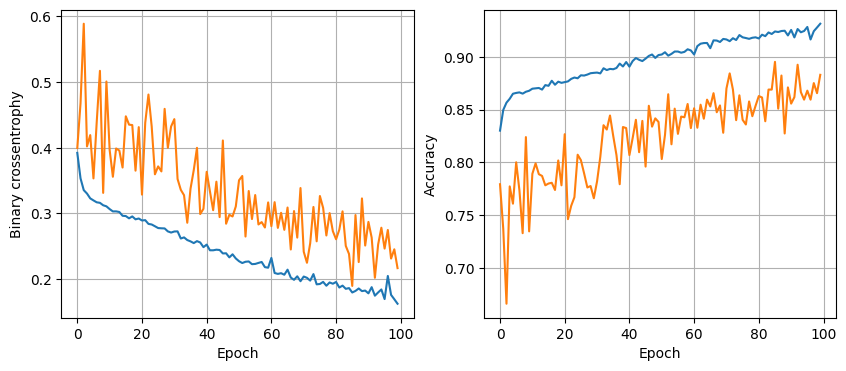

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.4822
Validation loss: [0.4835580885410309, 0.8667192459106445]
--------------------------------------------------
64 nodes, dropout 0, lr 0.01, batch size 128


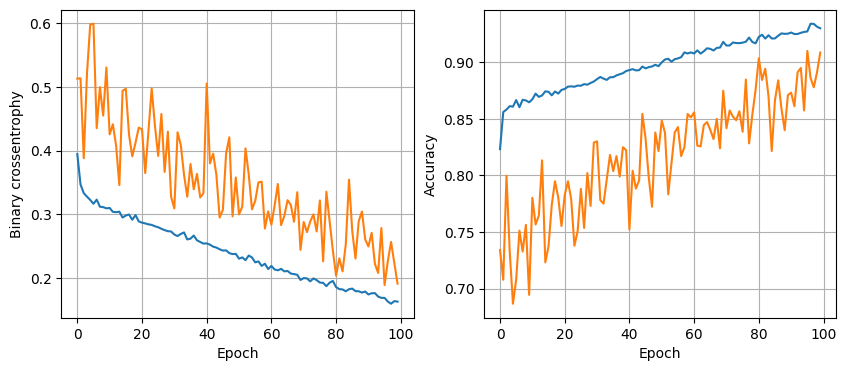

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.4686
Validation loss: [0.5132360458374023, 0.8564668893814087]
--------------------------------------------------
64 nodes, dropout 0, lr 0.005, batch size 32


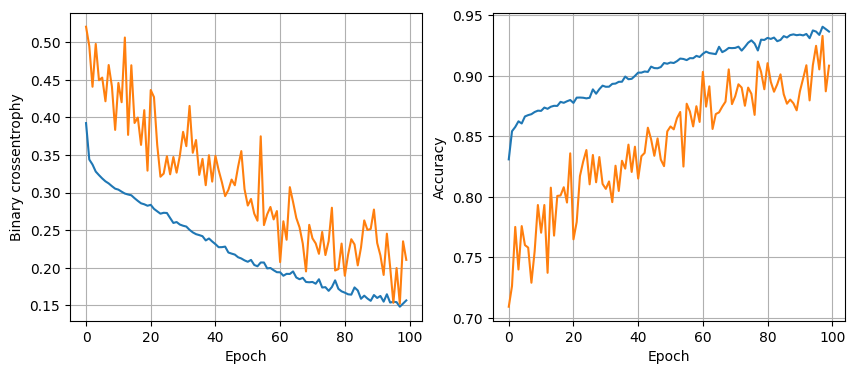

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8433 - loss: 0.5597
Validation loss: [0.5715994238853455, 0.8412197828292847]
--------------------------------------------------
64 nodes, dropout 0, lr 0.005, batch size 64


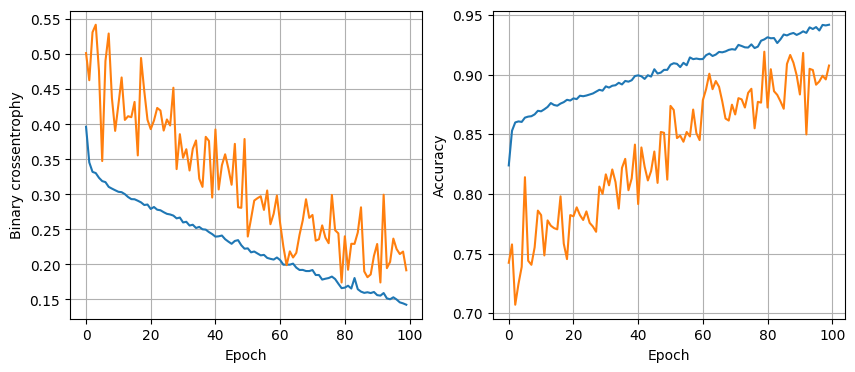

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8564 - loss: 0.4991
Validation loss: [0.5153543949127197, 0.8514721393585205]
--------------------------------------------------
64 nodes, dropout 0, lr 0.005, batch size 128


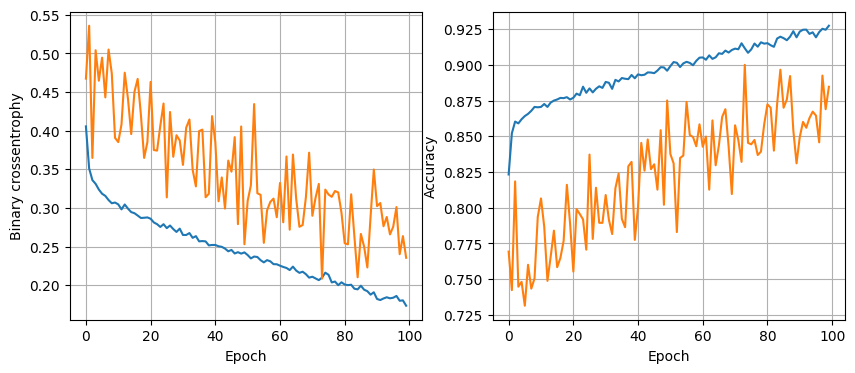

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.4104
Validation loss: [0.4165121912956238, 0.8643532991409302]
--------------------------------------------------
64 nodes, dropout 0, lr 0.001, batch size 32


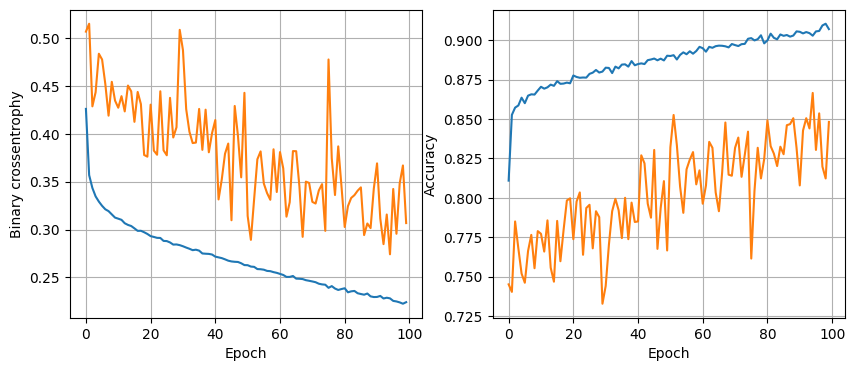

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8757 - loss: 0.3083
Validation loss: [0.32058092951774597, 0.8764458298683167]
--------------------------------------------------
64 nodes, dropout 0, lr 0.001, batch size 64


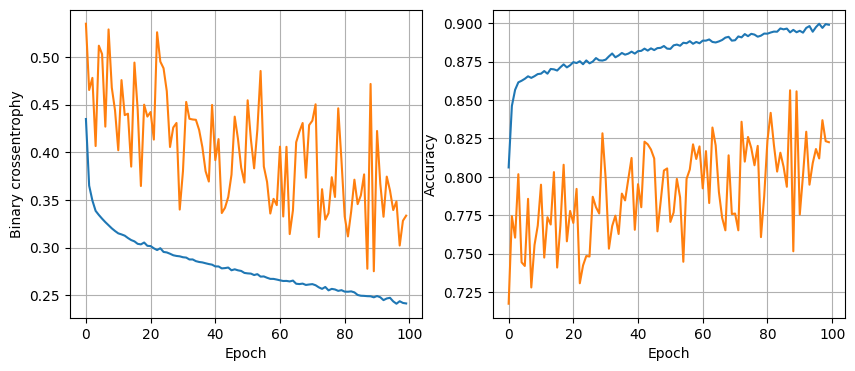

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 0.3100
Validation loss: [0.31528833508491516, 0.8717139959335327]
--------------------------------------------------
64 nodes, dropout 0, lr 0.001, batch size 128


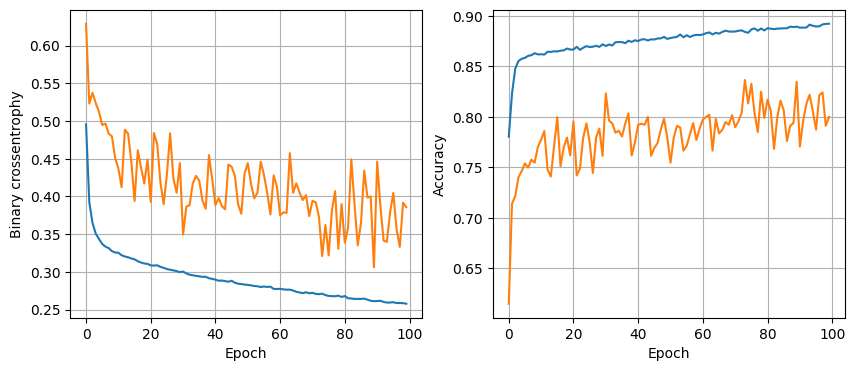

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8758 - loss: 0.2917
Validation loss: [0.2997066378593445, 0.8785489201545715]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.01, batch size 32


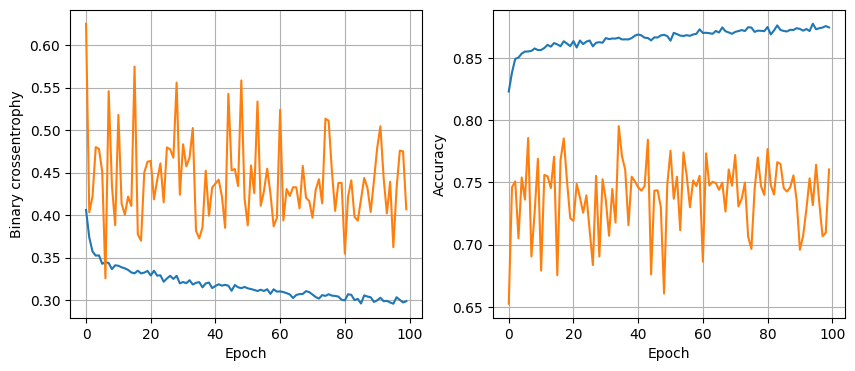

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8835 - loss: 0.2943
Validation loss: [0.3027048408985138, 0.8806519508361816]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.01, batch size 64


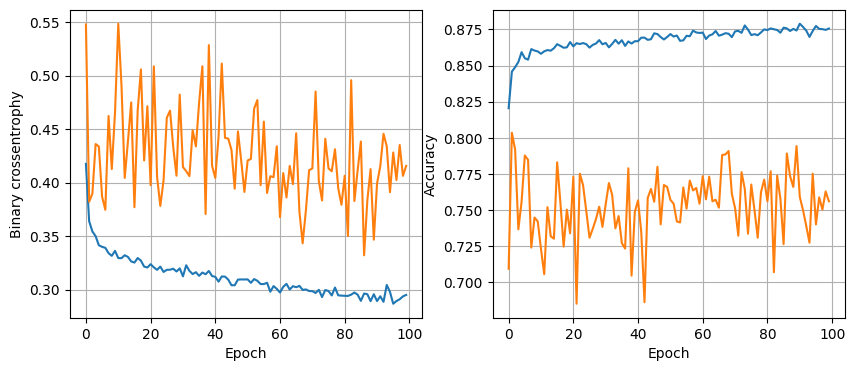

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8838 - loss: 0.2802
Validation loss: [0.29002925753593445, 0.8832807540893555]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.01, batch size 128


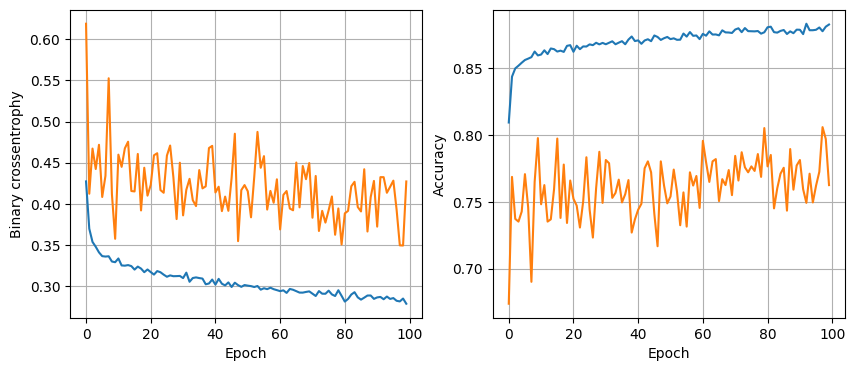

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.2749
Validation loss: [0.2864041030406952, 0.8824921250343323]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.005, batch size 32


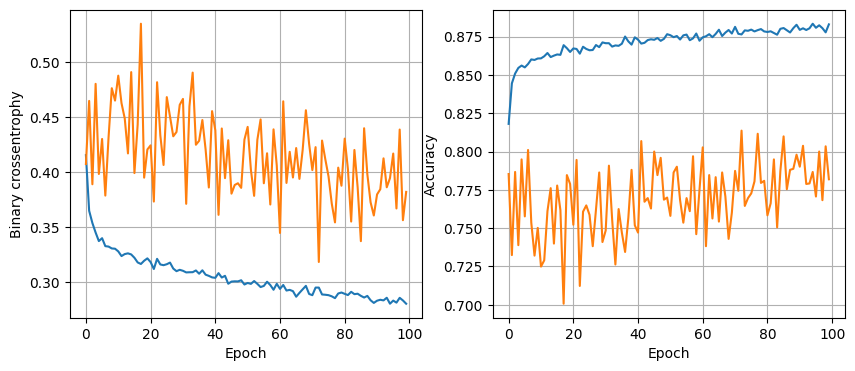

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.2865
Validation loss: [0.29487675428390503, 0.8809148073196411]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.005, batch size 64


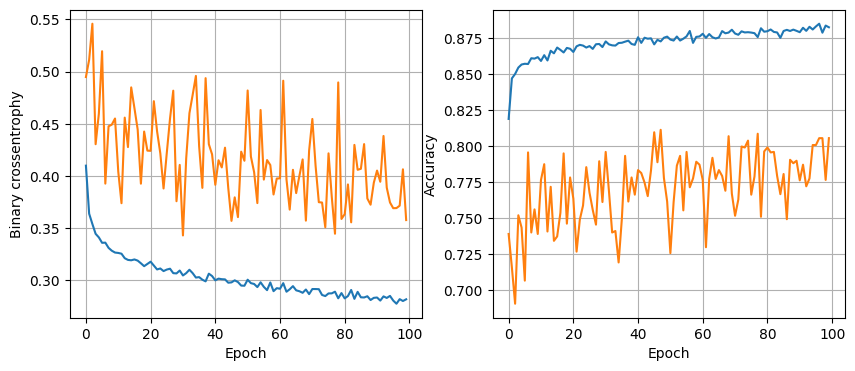

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - loss: 0.2786
Validation loss: [0.28903406858444214, 0.8859095573425293]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.005, batch size 128


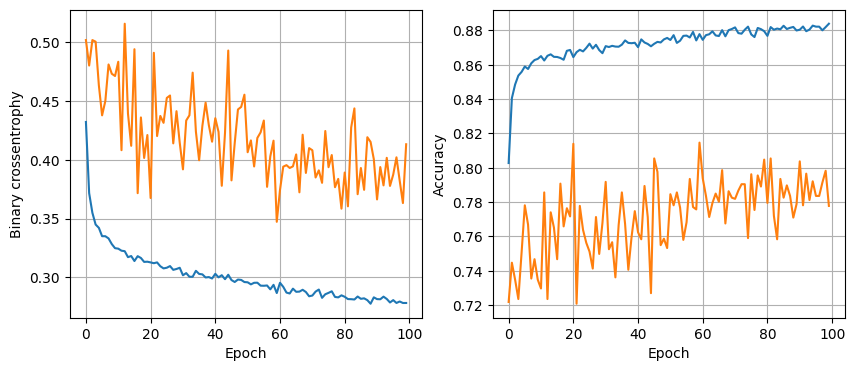

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8822 - loss: 0.2837
Validation loss: [0.2918289601802826, 0.8809148073196411]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.001, batch size 32


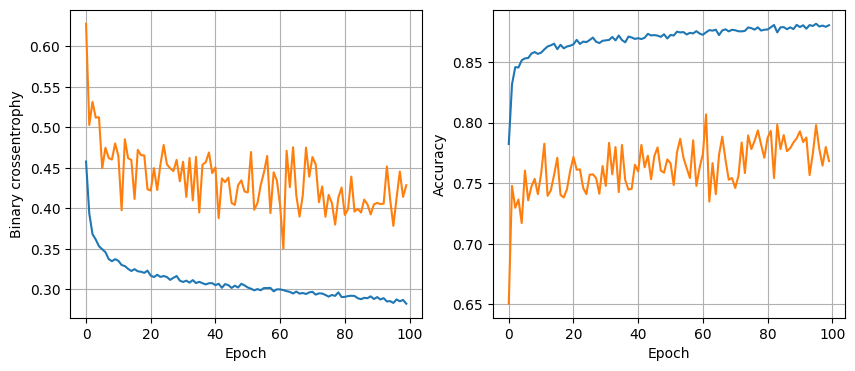

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8844 - loss: 0.2774
Validation loss: [0.2870613634586334, 0.8824921250343323]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.001, batch size 64


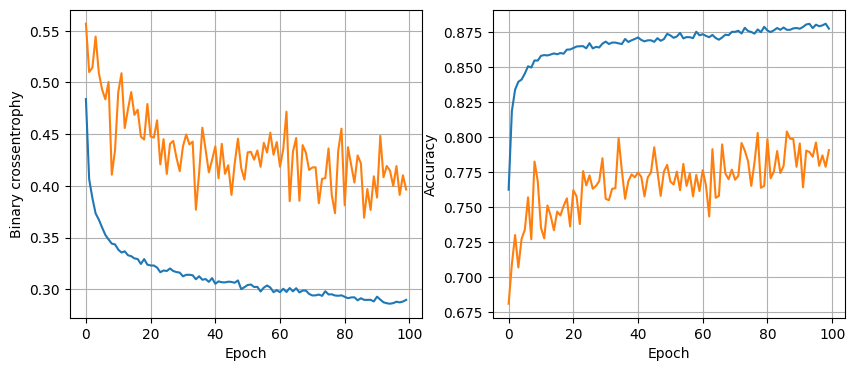

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.2767
Validation loss: [0.2838798761367798, 0.8877497315406799]
--------------------------------------------------
64 nodes, dropout 0.2, lr 0.001, batch size 128


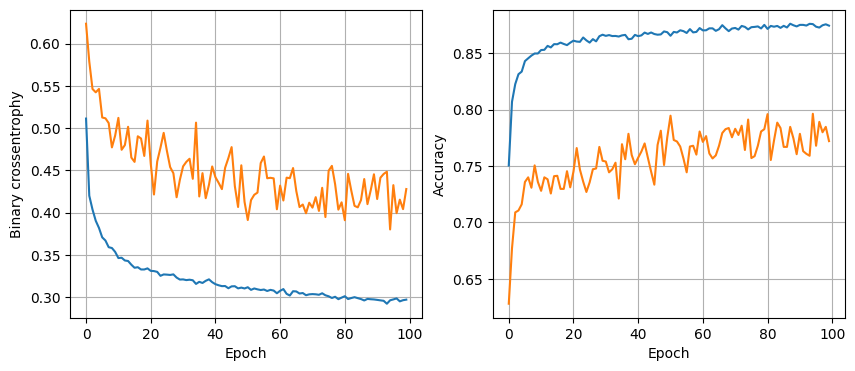

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8846 - loss: 0.2815
Validation loss: [0.2892913222312927, 0.8811777234077454]
--------------------------------------------------


"for the commented-out if statement in the above loop, for some reason,\nit worked in her code but not in mine as we can't compare int and list."

In [27]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        print(f"Validation loss: {val_loss}")
        print("-"*50)
        v_loss = val_loss[0]
        if v_loss < least_val_loss:
          least_val_loss = v_loss
          least_loss_model = model



In [30]:
print(str(least_loss_model.summary()))

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789 (57.77 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,860 (38.52 KB)

None
